In [2]:
# import required packages
import cv2
import dlib
 
import time

 


In [ ]:
#wget   http://arunponnusamy.com/files/mmod_human_face_detector.dat

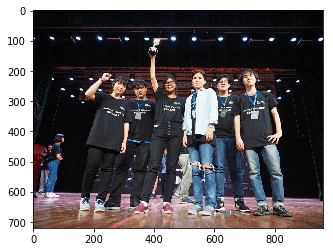

In [15]:
# try face detector hog/cnn
 
image = cv2.imread("asc2018.jpg")

if image is None:
    print("Could not read input image")
    exit()

plt.figure()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
preview = plt.imshow(image_rgb)   
plt.show()

# initialize hog + svm based face detector
hog_face_detector = dlib.get_frontal_face_detector()

# initialize cnn based face detector with the weights
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
#cnn_face_detector = dlib.cnn_face_detection_model_v1("shape_predictor_68_face_landmarks.dat")


Execution Time (in seconds) :
('HOG : ', '0.58')


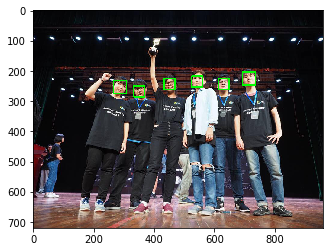

In [16]:
# try hog detector
import matplotlib.pyplot as plt
%matplotlib inline

#apply face detection (hog)
start = time.time()


faces_hog = hog_face_detector(image, 1)

end = time.time()
print("Execution Time (in seconds) :")
print("HOG : ", format(end - start, '.2f'))



# loop over detected faces
for face in faces_hog:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # draw box over face
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 3)

plt.figure(figsize=(10,8))
plt.clf()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
preview = plt.imshow(image_rgb)   
plt.show()

('CNN : ', '4.02')


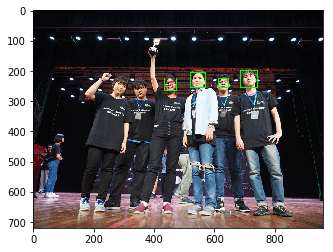

In [110]:
#try cnn detector
start = time.time()

# apply face detection (cnn)
faces_cnn = cnn_face_detector(image)

end = time.time()
print("CNN : ", format(end - start, '.2f'))

# loop over detected faces
for face in faces_cnn:
    x = face.rect.left()
    y = face.rect.top()
    w = face.rect.right() - x
    h = face.rect.bottom() - y

     # draw box over face
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)

plt.figure()
plt.clf()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
preview = plt.imshow(image_rgb)   
plt.show()

In [111]:
# try opencv face detection  
image = cv2.imread("asc2018.jpg")

if image is None:
    print("Could not read input image")
    exit()
    
faceCascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')



gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces in the image

faces = faceCascade.detectMultiScale(gray ,  1.1, 5)




Found 4 faces!


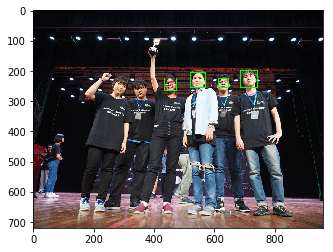

In [112]:
print "Found {0} faces!".format(len(faces))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)


plt.figure(figure=(10,8))
plt.clf()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
preview = plt.imshow(image_rgb)   
plt.show()

In [70]:

#https://fairyonice.github.io/Object-detection-using-Haar-feature-based-cascade-classifiers-on-my-face.html

# find best parameter for opencv cascade face detector

    
def get_bounding_box(img,cascade,scaleFactor=None,minNeighbors=None,printing=False):
    ## process images in gray scales, 
    ## because we don't need color information to decide if a picture has a face or not
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img = np.array(gray_img, dtype='uint8')
    faces = cascade.detectMultiScale(gray_img, 
                                     scaleFactor=scaleFactor,## 1.1 
                                               minNeighbors=int(minNeighbors)); 
    
    if printing:
        print('Faces found: ', len(faces))
    
    return(faces)

In [107]:
import numpy as np

## extract 100 images
Nsample = 50
myslice  = 10
#img_subset = imgs[0:Nsample*myslice:myslice]
haar_body_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

haar_eye_cascade = cv2.CascadeClassifier('haarcascade_righteye_2splits.xml')

lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

# opencv face detection  
image1 = cv2.imread("asc2018.jpg")
image2 = cv2.imread("bootcamp2017.jpg")
image_array = []
for i in range(10):
    file_name = 'test'+str(i+1)+'.jpg'
    img = cv2.imread(file_name)
    if img is None:
        print (file_name)
    image_array.append( img)
    
 
img_subset =image_array
img_subset.append(image1)
img_subset.append(image2)
minNeighbors = [1, 2, 3, 5, 8, 10]
scaleFactors = [1.05,1.1,1.5,1.8]

Nallfaces, neigh, scaleF, times = [], [], [], []
for minNeighbor in minNeighbors:
    for scaleFactor in scaleFactors:
        start = time.time()
        faces = []
        for img in img_subset:
            fs = get_bounding_box(img,
                                  lbp_face_cascade,
                                 scaleFactor,
                                 minNeighbor)
            faces.append(len(fs))
        end = time.time()
        
        Nallfaces.append(faces)
        neigh.append(minNeighbor)
        scaleF.append(scaleFactor)
        times.append(end - start)

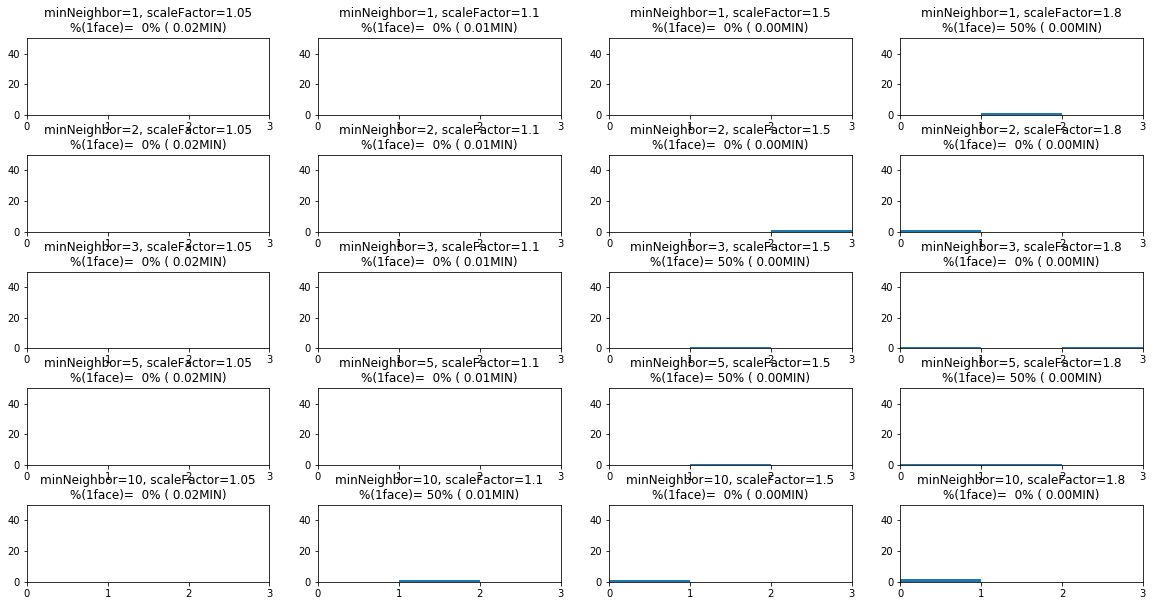

minNeighbor=10, scaleFactor=1.1


In [87]:
import matplotlib.pyplot as plt
count = 1
best_prop1 = 0
fig = plt.figure(figsize=(20,10))
plt.clf()
for k in range(len(minNeighbors)*len(scaleFactors)):
    allfaces = np.array(Nallfaces[k])
    prop1 = 100*np.mean(allfaces==1)
    nei,sF = neigh[k],scaleF[k]
    if prop1 >= best_prop1:
        best_prop1 = prop1
        best_para = (nei,sF)
            
    fig.subplots_adjust(hspace = 0.52)
    ax = fig.add_subplot(len(minNeighbors),
                         len(scaleFactors),
                         count)
        
    ax.set_ylim(0,50)
    ax.set_xlim(0,3)
    ax.set_xticks([0,1,2,3])    
    ax.hist(allfaces,bins=[0,1,2,3])
    ax.set_title("minNeighbor={}, scaleFactor={}\n%(1face)={:3.0f}% ({:5.2f}MIN)".format(
                 nei,sF,prop1,times[k]/60))
    count += 1
plt.show()

#best_para = (10,1.05)
print("minNeighbor={}, scaleFactor={}".format(*best_para))

In [108]:
def plot_rectangle(faces,ax,color="red"):
    for face in faces:
         ax.add_patch(
                patches.Rectangle(
                        face[:2],   # (x,y)
                        face[2],          # width
                        face[3],         # height
                        fill=False,
                        color=color
                    )
                )
def plot_objects(img,objecs,object_names,ax):
        colors = ["red","blue","yellow","purple"]
        ax.imshow(img/255.0)
        count = 100
        for obj, nm, color in zip(objecs,object_names,colors):
            plot_rectangle(obj,ax,color=color)
            ax.text(800,count,nm,color=color,fontsize=20)
            count += 50

In [95]:
dir_image = "save_image"
try:
    os.mkdir(dir_image)
    print("folder is created.")
except:
    pass

In [109]:
import matplotlib.patches as patches

## name of all the classifiers
obj_nms = ["haar face","haar eye","haar body", "lbp face"]
## all the classifiers
objects = [haar_face_cascade,haar_eye_cascade,haar_body_cascade, lbp_face_cascade]
count = 0 
y_pred = None
data = []

for myid, img in enumerate(img_subset):
    objs = []
    for haar in objects:
        objs.append(get_bounding_box(img,haar,
                                   best_para[0],
                                   best_para[1]))

    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    
    fig = plt.figure(figsize=(10,10))        
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    plot_objects(image_rgb,objs,obj_nms,ax)
    plt.savefig(dir_image + "/frame{:05.0f}.jpg".format(myid),
                bbox_inches='tight',pad_inches=0)
    
    plt.close('all')

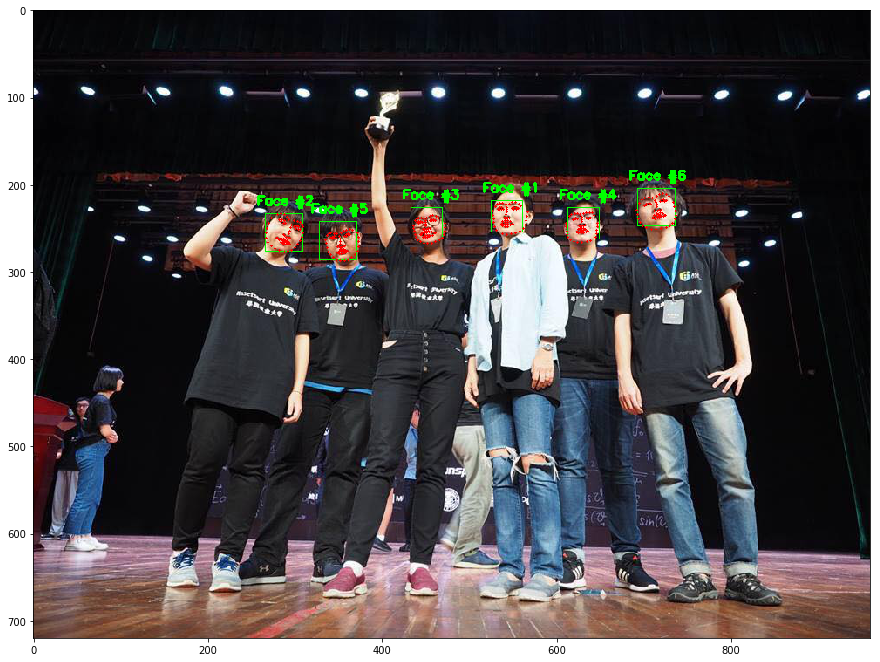

In [28]:
#  find face landmark
# https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/

import matplotlib.pyplot as plt
%matplotlib inline
from imutils import face_utils
# import required packages
import cv2
import dlib
 
import time

dlib_detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")



 
 

# loop over detected faces

image = cv2.imread("asc2018.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces  = dlib_detector(image_gray, 1)
    
for (i, rect) in enumerate(faces):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = shape_predictor(image_gray, rect)
	shape = face_utils.shape_to_np(shape)
 
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
 
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
 
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
        
plt.figure(figsize=(15,12))
plt.clf()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
preview = plt.imshow(image_rgb)   
plt.show()


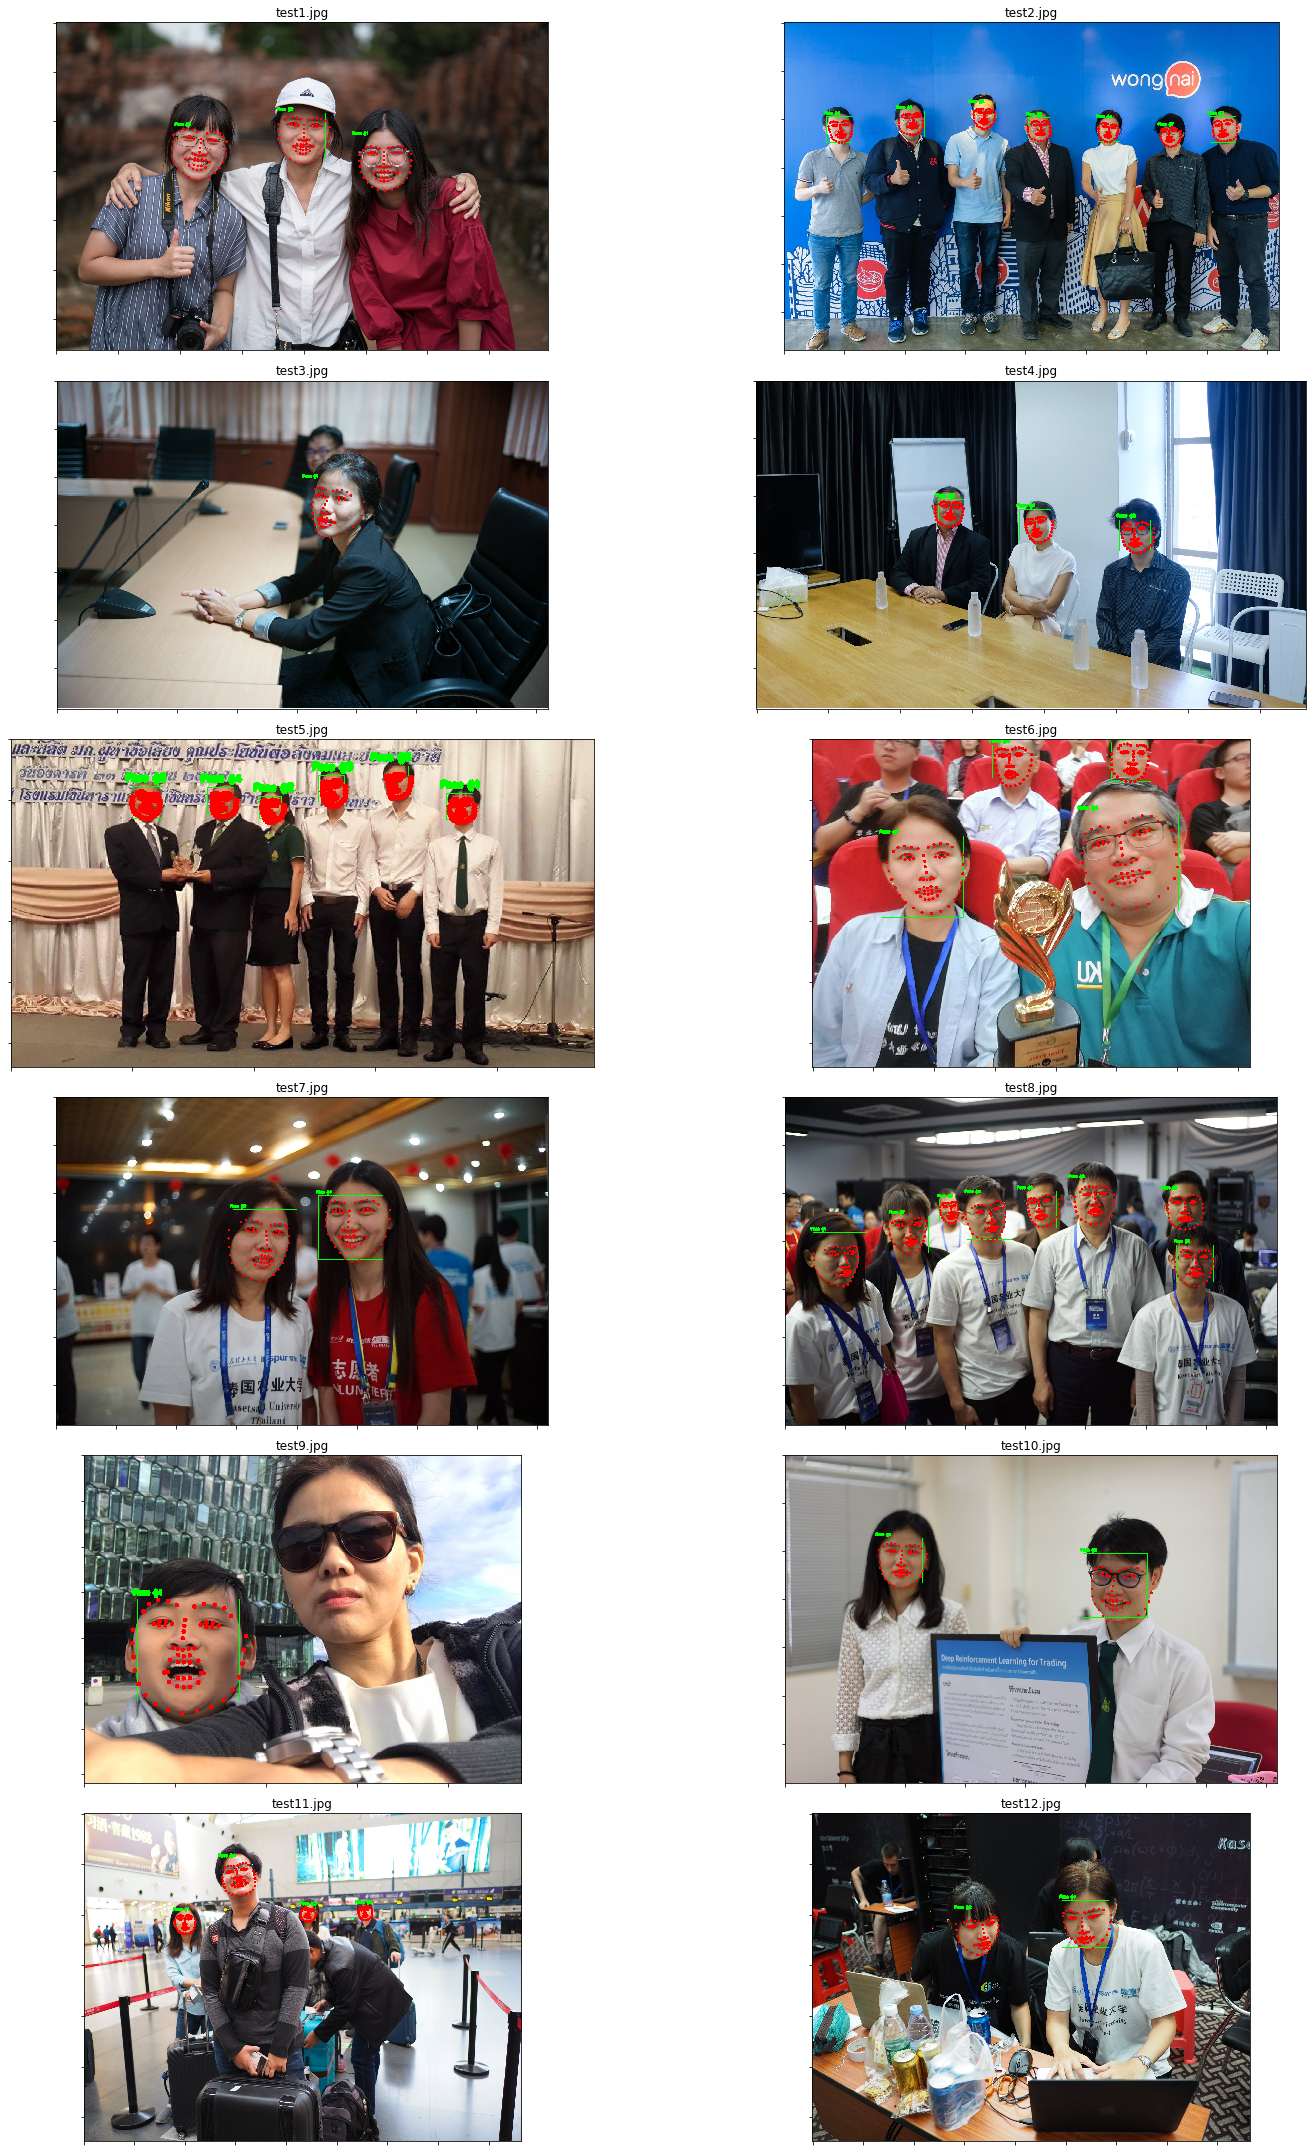

In [37]:
#  find face landmark
import matplotlib.pyplot as plt
 
%matplotlib inline
from imutils import face_utils
# import required packages
import cv2
import dlib
 
import time

dlib_detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")



# loop over detected faces
fig = plt.figure(figsize=(30,30)  )
plt.clf()
 
num = 0 
for i in range(12):
    file_name = "test"+str(i+1)+".jpg"
    image = cv2.imread(file_name)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces  = dlib_detector(image_gray, 1)
    
    for (i, rect) in enumerate(faces):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = shape_predictor(image_gray, rect)
        shape = face_utils.shape_to_np(shape)

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

        # show the face number
        cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 5)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(image, (x, y), 5, (0, 0, 255), -1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    num = num + 1
    ax = fig.add_subplot(6,2,num )
     
    ax.imshow(image_rgb)
    ax.set_title(file_name)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.tight_layout()
    #fig.subplots_adjust(wspace=0, hspace=0)
    ax.set_aspect('equal')
plt.show()
